# Importing necessary modules

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sys
import random

# Importing data and text processing

In [2]:
file=open(r"C:\Users\hp\Desktop\Natural Language Processing\A simple spam classifier\SMSSpamCollection","r")

In [3]:
reader=list(csv.reader(file,delimiter="\t"))

In [4]:
labels=[]
text=[]
for i in reader:
    labels.append(i[0])
    text.append(i[1])

In [5]:
for i in range(len(text)):
    text[i]=text[i].lower()

In [6]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("cats........."))

cats.........


In [7]:
"kjf'k....jfajfv".split(".")

["kjf'k", '', '', '', 'jfajfv']

In [8]:
def text_cleaning1(text):
    for i in range(len(text)):
        t=[]
        for j in text[i].split(" "):
            #if "." in j:
                #print(j)
             #   hold=text[i].split(".")
              #  for z in hold:
               #     if len(z)>0:
                #        t.append(z)
            #else:
            t.append(j)
        text[i]=t
    return text

In [9]:
def text_cleaning(text):
    for i in range(len(text)):
        t=[]
        for j in text[i]:
            j=j.strip(",")
            j=j.strip(".")
            j=j.strip(".")
            j=j.strip("\'")
            j=j.strip("!")
            j=j.strip("?") 
            j=j.strip("\"")
            j=j.strip(" ")
            j=j.strip("")
            t.append(lemmatizer.lemmatize(j))
        text[i]=t
    return text

In [10]:
"b'".strip("\'")

'b'

In [11]:
text=text_cleaning(text_cleaning1(text))

In [12]:
text

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'question(std',
  'txt',
  "rate)t&c's",
  'apply',
  "08452810075over18's"],
 ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'],
 ['nah',
  'i',
  "don't",
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'life',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  "it's",
  'been',
  '3',
  "week's",
  'now',
  'and',
  'no',
  'word',
  'back',
  "i'd",
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  '

In [13]:
from nltk.corpus import stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    text_new=[]
    for i in text:
        t=[]
        for j in i:
            if j not in stop_words:
                t.append(j)
        text_new.append(t)
    return text_new    

In [14]:
text=remove_stopwords(text)

In [15]:
text

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receive',
  'entry',
  'question(std',
  'txt',
  "rate)t&c's",
  'apply',
  "08452810075over18's"],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  '3',
  "week's",
  'word',
  'back',
  "i'd",
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'â£1.50',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  '(oru',
  'minnaminunginte',
  'nurungu',
  'vettam)',
  'ha',
  'set',
  'callertune',
  'caller',


In [22]:
text_new=[]
for i in text:
    t=""
    for j in i:
        t=t+" "+j
    t=t.strip(" ")
    text_new.append(t)

In [23]:
text_new

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 "free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 "freemsg hey darling 3 week's word back i'd like fun still tb ok xxx std chgs send â£1.50 rcv",
 'even brother like speak treat like aid patent',
 'per request melle melle (oru minnaminunginte nurungu vettam) ha set callertune caller press *9 copy friend callertune',
 'winner valued network customer selected receivea â£900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030',
 "i'm gonna home soon want talk stuff anymore tonight k i've cried enough today",
 'six chance win cash 100 20,000 pound txt> csh11 send 87575 cost 150p/

# Class Imbalance

In [24]:
ham=[]
ham_labels=[]
spam=[]
spam_labels=[]
for i in range(len(labels)):
    if labels[i]=="ham":
        ham.append(text[i])
        ham_labels.append(labels[i])
    else:
        spam.append(text[i])
        spam_labels.append(labels[i])

In [25]:
len(ham),len(ham_labels),len(spam),len(spam_labels)

(4825, 4825, 747, 747)

In [26]:
#ham=np.array(ham)
random.shuffle(ham)

In [27]:
text1=ham[0:747]
text1.extend(spam)
labels1=ham_labels[0:747]
labels1.extend(spam_labels)

In [28]:
len(text1),len(labels1)

(1494, 1494)

In [29]:
random.shuffle(text1)
random.shuffle(labels1)

# Text processing modules

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import GridSearchCV , StratifiedKFold, train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

# Text preprocessing

In [31]:
num=0
for i in labels1:
    if i=="ham":
        num+=1

In [32]:
num,len(labels1)-num

(747, 747)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(text_new,labels,test_size=0.20, random_state=42)

# Logistic Regression

In [47]:
clf_lr=LogisticRegression(class_weight="balanced")

In [48]:
clf_parameters = {
    'clf__solver':('newton-cg','lbfgs','liblinear'),
    }  

In [49]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
    ('clf', clf_lr),])

In [50]:
feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  # Unigrams, Bigrams or Trigrams
    }

In [51]:
parameters={**feature_parameters,**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [52]:
clf=grid.best_estimator_

In [53]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=3,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=

In [464]:
clf.predict(x_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [68]:
predicted=list(clf.predict(x_test))

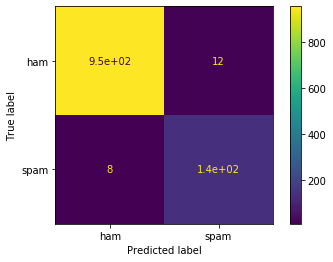

In [69]:
plot_confusion_matrix(clf,x_test,y_test)
plt.show()

In [70]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.92      0.95      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [71]:
for i in range(len(x_test)):
    if predicted[i]!=y_test[i]:
        print(x_test[i])

hey free call
customer place call
reminder: downloaded content already paid goto http://doit mymoby tv/ collect content
hi hope u get txt~journey hasnt gd,now 50 min late think
babe: u want dont u baby im nasty thing 4 filthyguys fancy rude time sexy bitch go slo n hard txt xxx slo(4msgs)
yup next stop
send ur birthdate month year tel u ur life partner's name method calculation reply must
hello darling today would love chat dont tell look like sexy
realize 40 year we'll thousand old lady running around tattoo
new deus ex game comin early next yr
call tell infront call
text doesnt reply let know log
sorry missed call let's talk time i'm 07090201529
burger king - wanna play footy top stadium get 2 burger king 1st sept go large super coca-cola walk winner
k..i deleted contact
call da waiting call
private 2003 account statement 078
customer place call
u receive msg
email alertfrom: jeri stewartsize: 2kbsubject: low-cost prescripiton drvgsto listen email call 123


# Support vector machine

In [73]:
svm_model = Pipeline([
    ('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
    ('clf', LinearSVC(class_weight="balanced")),])

In [74]:
y_train1=[]
for i in y_train:
    if i=="spam":
        y_train1.append(1)
    else:
        y_train1.append(0)

In [75]:
svm_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='\\b\\w+\\b', tokenizer=None,
                                 vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight='balanced', dual=True,
                           fit_intercept=True, intercept_scaling=1,
                      

In [76]:
predicted = svm_model.predict(x_test);

In [77]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.97      0.96      0.97       149

    accuracy                           0.99      1115
   macro avg       0.98      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



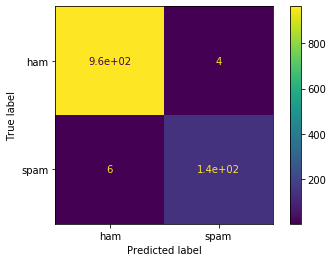

In [78]:
plot_confusion_matrix(svm_model,x_test,y_test)
plt.show()

In [79]:
for i in range(len(x_test)):
    if predicted[i]!=y_test[i]:
        print(x_test[i],y_test[i])

customer place call ham
th gower mate am! r u man good wale ill b back â‘morrow c u wk wa msg 4 â– random ham
babe: u want dont u baby im nasty thing 4 filthyguys fancy rude time sexy bitch go slo n hard txt xxx slo(4msgs) spam
yup next stop ham
hello darling today would love chat dont tell look like sexy spam
realize 40 year we'll thousand old lady running around tattoo spam
sorry missed call let's talk time i'm 07090201529 spam
burger king - wanna play footy top stadium get 2 burger king 1st sept go large super coca-cola walk winner spam
customer place call ham
email alertfrom: jeri stewartsize: 2kbsubject: low-cost prescripiton drvgsto listen email call 123 spam


# Naive bayes classifier

In [63]:
naive_bayes=Pipeline([("vect",CountVectorizer()),("tfidf",TfidfTransformer()),("clf",MultinomialNB())])

In [64]:
naive_bayes.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [65]:
print(classification_report(y_test,naive_bayes.predict(x_test)))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.80      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



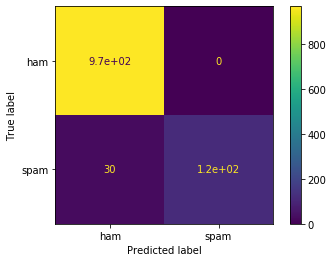

In [66]:
plot_confusion_matrix(naive_bayes,x_test,y_test)
plt.show()

In [67]:
pred=naive_bayes.predict(x_test)
for i in range(len(x_test)):
    if pred[i]!=y_test[i]:
        print(x_test[i])

reminder: downloaded content already paid goto http://doit mymoby tv/ collect content
guess somebody know secretly fancy wanna find give u call 09065394973 landline datebox1282essexcm61xn 150p/min 18
oh god i've found number i'm glad text back xafter msg cst std ntwk chg â£1.50
next amazing xxx picsfree1 video sent enjoy one vid enough 2day text back keyword picsfree1 get next video
rock yr chik get 100's filthy film &xxx pic yr phone rply filth 69669 saristar ltd e14 9yt 08701752560 450p per 5 day stop2 cancel
babe: u want dont u baby im nasty thing 4 filthyguys fancy rude time sexy bitch go slo n hard txt xxx slo(4msgs)
want cock hubby's away need real man 2 satisfy txt wife 89938 string action (txt stop 2 end txt rec â£1.50ea otbox 731 la1 7ws )
hello darling today would love chat dont tell look like sexy
guess somebody know secretly fancy wanna find give u call 09065394514 landline datebox1282essexcm61xn 150p/min 18
realize 40 year we'll thousand old lady running around tattoo
fant